In [4]:
!pip install nltk
import pandas as pd
import numpy as np
import nltk
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

stemmer = nltk.SnowballStemmer("english")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def clean(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove unwanted content
    text = re.sub('\[.*?\]','',text)  # Remove square brackets content
    text = re.sub('https?://\S+|www\.\S+','',text)  # Remove URLs
    text = re.sub('<.*?>+','',text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)  # Remove punctuation
    text = re.sub('\n','',text)  # Remove newline characters

    words = text.split()
    words = [word for word in words if word not in nltk.corpus.stopwords.words('english')]  # Remove stopwords

    # Perform stemming
    words = [stemmer.stem(word) for word in words]

    # Join words back to text
    text = " ".join(words)

    # Handle cases where text becomes empty
    if not text.strip():
        text = "emptytweet"  # Placeholder for empty tweets

    return text


In [8]:
data = pd.read_csv('train2.csv')  # Replace with your actual file path

# Apply the cleaning function to the 'tweet' column
data['tweet'] = data['tweet'].apply(clean)

# Check for empty tweets
empty_tweets = data[data['tweet'] == "emptytweet"]
print(f"Number of empty tweets: {len(empty_tweets)}")

data["labels"]= data["class"].map({0: "Hate Speech", 1:"Offensive Language", 2:"Normal"})

# Ensure 'labels' column exists
if 'labels' not in data.columns:
    raise ValueError("The 'labels' column is missing in the dataset.")

Number of empty tweets: 0


In [10]:
# Ensure no empty labels exist
data = data[data['labels'].notnull()]

# Prepare features and labels
x = np.array(data["tweet"])
y = np.array(data["labels"])

# Apply CountVectorizer to convert text into numeric features
cv = CountVectorizer()
X = cv.fit_transform(x)


In [11]:
vocabulary_size = len(cv.get_feature_names_out())
print(f"Vocabulary size: {vocabulary_size}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
print(f"Training Accuracy: {clf.score(X_train, y_train)}")
print(f"Test Accuracy: {clf.score(X_test, y_test)}")


Vocabulary size: 33741
Training Accuracy: 0.9997590941941701
Test Accuracy: 0.8771243428291967


In [12]:
sample = "hello"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['Normal']


<ipython-input-13-307633654b29>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="viridis")


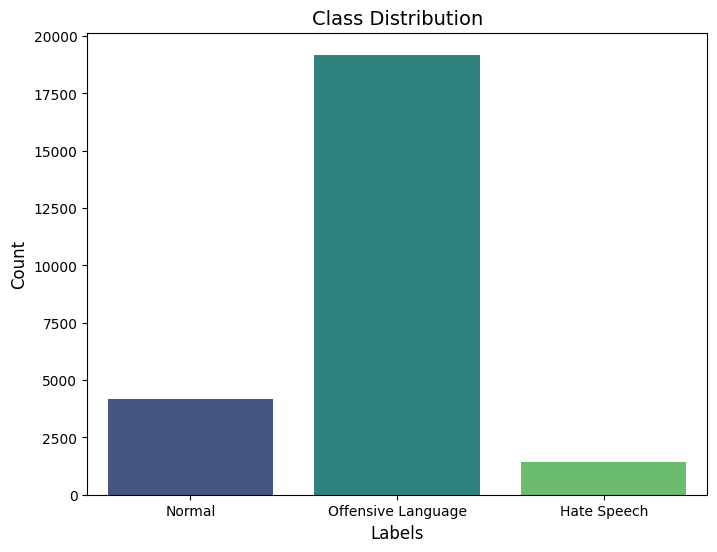

In [13]:
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

# 1. Visualizing Class Distribution
def plot_class_distribution(labels):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=labels, palette="viridis")
    plt.title("Class Distribution", fontsize=14)
    plt.xlabel("Labels", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

plot_class_distribution(y)

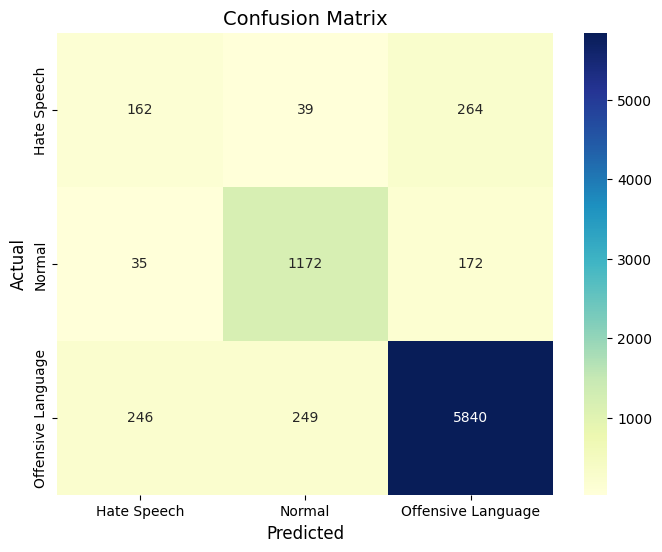

In [14]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.show()

# Get predictions before calling the function
y_pred = clf.predict(X_test)

# Ensure labels are sorted and unique
class_labels = sorted(set(y))

# Now call the function with y_pred defined
plot_confusion_matrix(y_test, y_pred, class_labels)

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.37      0.35      0.36       465
            Normal       0.80      0.85      0.83      1379
Offensive Language       0.93      0.92      0.93      6335

          accuracy                           0.88      8179
         macro avg       0.70      0.71      0.70      8179
      weighted avg       0.88      0.88      0.88      8179

